
## Chapter 4 [Spectroscopy](Ch3-Spectroscopy.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# Generation of Characteristic X-Rays 


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes







## First we import the essential libraries
All we need here should come with the annaconda or any other package

In [4]:
# import matplotlib and numpy
%pylab --no-import-all notebook

import pickle  ## we use this library to open the data file

__notebook__ = 'CH4-X_Rays'
__notebook_version__ = '2019_08_21'


Populating the interactive namespace from numpy and matplotlib


## X-Ray Families
The case is not always as simple as in the case of teh carbon atom in the [Introduction](CH4-Introduction_X_Rays.ipynb#X-Rays)

As the atomic number $Z$ increases the number of electrons in the respective energy states increases. With increasing complexity of the shell structure more options for relaxtions are available with different probabilities.

For example a Na atom which has an M-shell The 1s state can be filled by an L- or an M-shell, producing two different characteristic X-rays:

- K-L$_{2,3} ($K\alpha$): $E_X = $E_K- E_L$ = 104 eV
- K-M$_{2,3} ($K\beta$): $E_X = $E_K- E_M$ = 1071 eV

For heavier atoms than sodium more options exist:

![Nomenclature](./images_EDS/Nomenclature.jpg)



## X-ray Nomenclature 

Two systems are in use for naming characteristic X-ray lines.

The oldest one is the Siegbahn system in wich first the shell where the  ionization occured is listed and then a greek letter that suggests the order of their families by their **relative intensity** ($\alpha>\beta>\gamma>\eta>\zeta$).

For closely related memebers of a family additionally numebrs are attched such as $L \beta_1$.

While most commercial software still uses the Siegbahn system the International Union of Pure and Applied Chemistry (IUPAC) has officially changed the system to a protocol that first dentoes the subshell were the ionization occured and followed with the term that indicates from which subshell the relaxation originates.

So $K\alpha_1$ is replaced by $K-L_3$.

![eds-lines](./images_EDS/eds-lines.jpg)

|Siegbahn|  -----IUPAC-----   |Siegbahn| -----IUPAC-----  |Siegbahn|  -----IUPAC-----  |
|--------| -------------- |--------| ------------ |--------| ------------- | 
| $K\alpha_1$| $K-L_3$    |$L\alpha_1$| $L_3-M_5$   |$M\alpha_1$| $M_5-N_7$|
| $K\alpha_2$| $K-L_2$    |$L\alpha_2$| $L_3-M_4$   |$M\alpha_2$| $M_5-N_6$|
| $K\beta_1$| $K-M_3$     |$L\beta_1$ | $L_2-M_4$   |$M\beta$    | $M_4-N_6$|
| $K\beta_2$| $K-N_{2,3}$ |$L\beta_2$ | $L_3-N_5$   |$M\gamma$   | $M_3-N_5$|
|           |             |$L\beta_3$ | $L_1-M_3$   |$M\zeta$     | $M_{4,5}-N_{2,3}$|
|           |             |$L\beta_4$ | $L_1-M_2$   |            | $M_3-N_1$|
|           |             |$L\gamma_1$| $L_2-N_4$   |            | $M_2-N_1$|
|           |             |$L\gamma_2$| $L_1-N_2$   |            | $M_3-N_{4,5}$|
|           |             |$L\gamma_3$| $L_1-N_3$   |            | $M_3-O_1$|
|           |             |$L\gamma_4$| $L_1-O_4$   |            | $M_3-O_{4,5}$|
|           |             |$L\zeta$   | $L_2-M_1$   |            | $M_2-N_4$|
|           |             |$L\iota$    | $L_3-M_1$   |            ||

## X-ray Weight of Lines

Within the excitation probaility of the characteristic X-ray lines are not equal. 

For sodium (see above for energies), 
the ratio of $K-L_{2,3}$ to $K-M$ is approximatively 150: 1. 

This ratios between the lines are a strong function of the atomic number $Z$.

We load the data of the X-Ray lines from data from [NIST](https://www.nist.gov/), the line weights are taken from the Program [DTSA-II](https://www.cstl.nist.gov/div837/837.02/epq/dtsa2/index.html), which is the quasi-standard in EDS analysis.


<IPython.core.display.Javascript object>


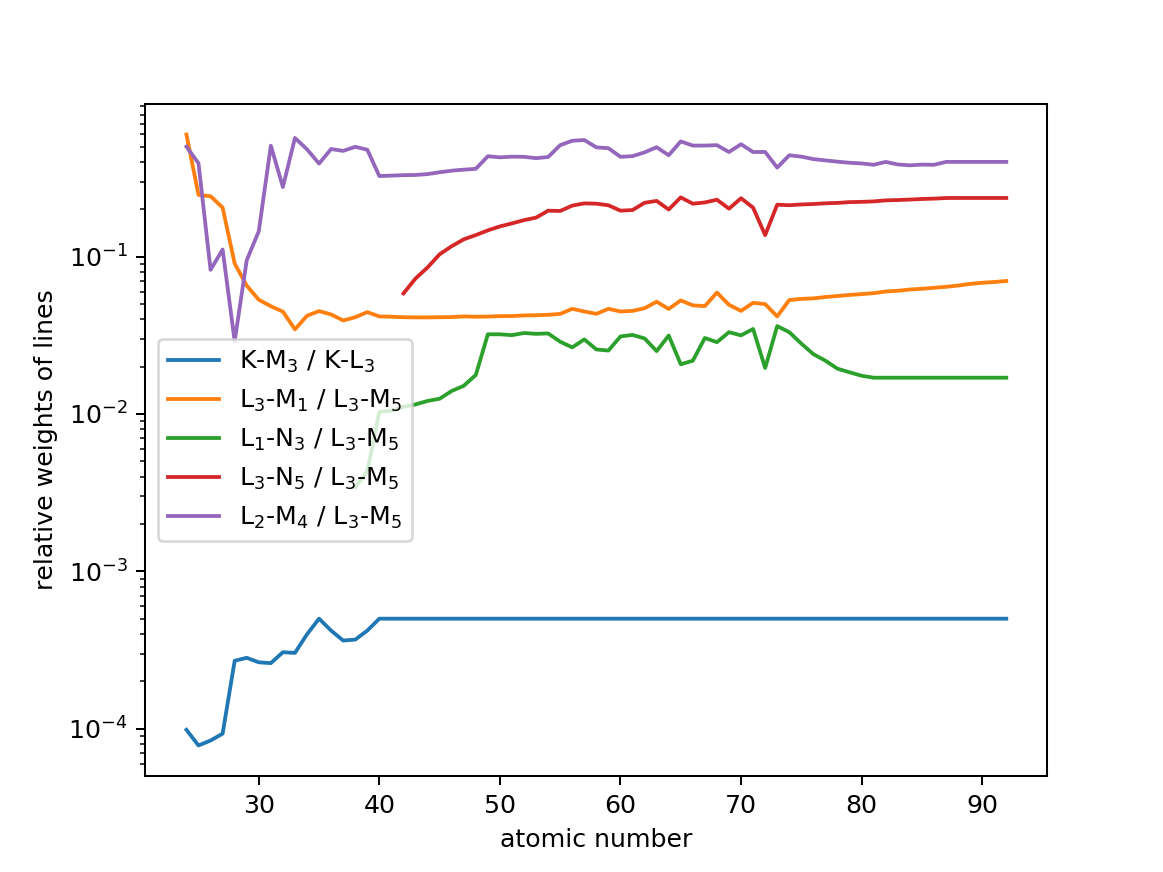

In [6]:
pkl_file = open('data/ffast.pkl', 'rb')
ffast = pickle.load(pkl_file)
pkl_file.close()

K_M5 = []
ele_K_M5 = []
L3_M1 = []
ele_M3_M1 = []
L1_N3 = []
ele_L1_N3 = []
L3_N5 =[]
ele_L3_N5 = []
L2_M4 = []
ele_L2_M4 = []
for element in range(1,93):
    if 'K-M5' in ffast[element]['lines']:
        K_M5.append(ffast[element]['lines']['K-M5']['weight']/ffast[element]['lines']['K-L3']['weight'])
        ele_K_M5.append(element)
    if 'L3-M5' in ffast[element]['lines']:
    
        if 'L3-M1' in ffast[element]['lines']:
            L3_M1.append(ffast[element]['lines']['L3-M1']['weight']/ffast[element]['lines']['L3-M5']['weight'])
            ele_M3_M1.append(element)
        
        if 'L1-N3' in ffast[element]['lines']:
            L1_N3.append(ffast[element]['lines']['L1-N3']['weight']/ffast[element]['lines']['L3-M5']['weight'])
            ele_L1_N3.append(element)
        
        if 'L3-N5' in ffast[element]['lines']:
            L3_N5.append(ffast[element]['lines']['L3-N5']['weight']/ffast[element]['lines']['L3-M5']['weight'])
            ele_L3_N5.append(element)
        
        if 'L2-M4' in ffast[element]['lines']:
            L2_M4.append(ffast[element]['lines']['L2-M4']['weight']/ffast[element]['lines']['L3-M5']['weight'])
            ele_L2_M4.append(element)
    
ele = np.linspace(1,94,94)

plt.figure()
plt.plot(ele_K_M5 ,K_M5, label = 'K-M$_3$ / K-L$_3$')
plt.plot(ele_M3_M1,L3_M1, label = 'L$_3$-M$_1$ / L$_3$-M$_5$')
plt.plot(ele_L1_N3,L1_N3, label = 'L$_1$-N$_3$ / L$_3$-M$_5$')
plt.plot(ele_L3_N5,L3_N5, label = 'L$_3$-N$_5$ / L$_3$-M$_5$')
plt.plot(ele_L2_M4,L2_M4, label = 'L$_2$-M$_4$ / L$_3$-M$_5$')
plt.ylabel('')
plt.gca().set_yscale('log')
plt.xlabel('atomic number')
plt.ylabel('relative weights of lines')

plt.legend();

## Characteristic X-ray Intensity

The cross section $Q_I$ (probability of excitation expressed as area) of an 

isolated atom ejecting an electron bound with energy $E_c$ (keV) by an 

electron with energy $E$ (keV) is:

$$Q_I \left(\frac{ionizations}{e^- (atoms/cm^2)} \right) =  6.51 \times 10^{-20} \left[ \frac{n_s b_s}{E E_c}\right]\log_e (c_s E / E_c) $$

where:
- $n_s$: number of electrons in shell or subshell $s$
- $b_s$, $c_s$: constants for a given shell $s$
- $E$: energy of the exciting electron
- $E_𝑐$: Critical ionization energy

For example for a K shell (Powell 1979): $n_K = 2$, $b_K = 0.35$, and $c_k = 1$

For silion the characteristic energy or binding energy for the K shell: $E_c = 1.838$ keV

The relationship between energy of the exciting electron and critical energy is important and is expressed as **overvoltage** $U$:
$$U =\frac{E}{E_c}$$



The overvoltage of the primary electron with energy $E_0$ is expressed as:
$$ U_0 =\frac{E_0}{E_c}$$

We can express the cross section with the overvoltage:

$$Q_I  =  6.51 \times 10^{-20} \left[ \frac{n_s b_s}{U E_c^2}\right]\log_e (c_s U) $$



<IPython.core.display.Javascript object>


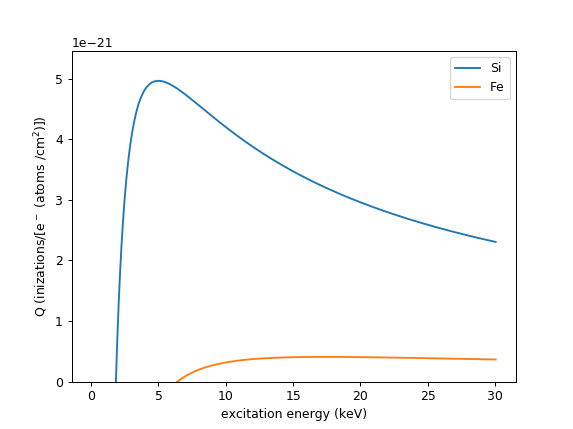

In [3]:
n_K = 2.0
b_K = 0.35
c_K = 1.0

# Silicon
E_c_Si = 1.838 
# Iron
E_c_Fe = 6.401

E = np.linspace(0,30,2048)+0.05
U = E/E_c_Si

Q_Si = 6.51*1e-20*n_K*b_K/(U * E_c_Si**2)* np.log(c_K * U)
U = E/E_c_Fe
Q_Fe = 6.51*1e-20*n_K*b_K/(U * E_c_Fe**2)* np.log(c_K * U)
plt.figure()
plt.plot(E,Q_Si, label ='Si')
plt.plot(E,Q_Fe, label ='Fe')

plt.ylim(0.,Q_Si.max()*1.1)
plt.xlabel('excitation energy (keV)')
plt.ylabel('Q (inizations/[e$^-$ (atoms /cm$^2$)])')
plt.legend();

https://doi.org/10.1016/0304-3991(89)90264-7

[E. Casnati, A. Tartari, and C. Baraldi; J. Phys. B: At. Mol. Phys..li (1982) 155-167: *An empirical approach to K-shell ionisation cross section by electrons*](https://doi.org/10.1088/0022-3700/15/1/022)
https://doi.org/10.1103/PhysRevA.77.042701
    

0.242053
0.0
0.12000000000000001
0.0
0.09666666666666666
0.0
0.12000000000000001
0.0
0.05333333333333334
0.0
0.26999999999999996
0.0
0.58
0.0
0.9566666666666667
0.0
1.3733333333333335
0.009351077026441156
1.8900000000000001
0.03802740033673537
2.3366666666666664
0.07725497069328575
2.9633333333333334
0.15026396670684886
3.7266666666666666
0.25883194495258405
4.5
0.38218855293442194
5.319999999999999
0.521025271155113
6.08
0.6533652182645574
6.913333333333333
0.7999834450352912
7.676666666666667
0.9342932180542711
8.546666666666669
1.0863666761258906
9.453333333333335
1.2430199963545971
10.389999999999999
1.4024547062624102
11.333333333333334
1.560326072039909
12.426666666666668
1.7397999537557087
13.683333333333334
1.9414555206998974
15.026666666666666
2.1516986865158096
16.443333333333335
2.3677439352694107
17.89666666666667
2.583681014396731
19.416666666666668
2.8037525849742346
21.043333333333333
3.033192582174947
22.846666666666668
3.2807648363926187
24.65
3.5217607997118114


<IPython.core.display.Javascript object>


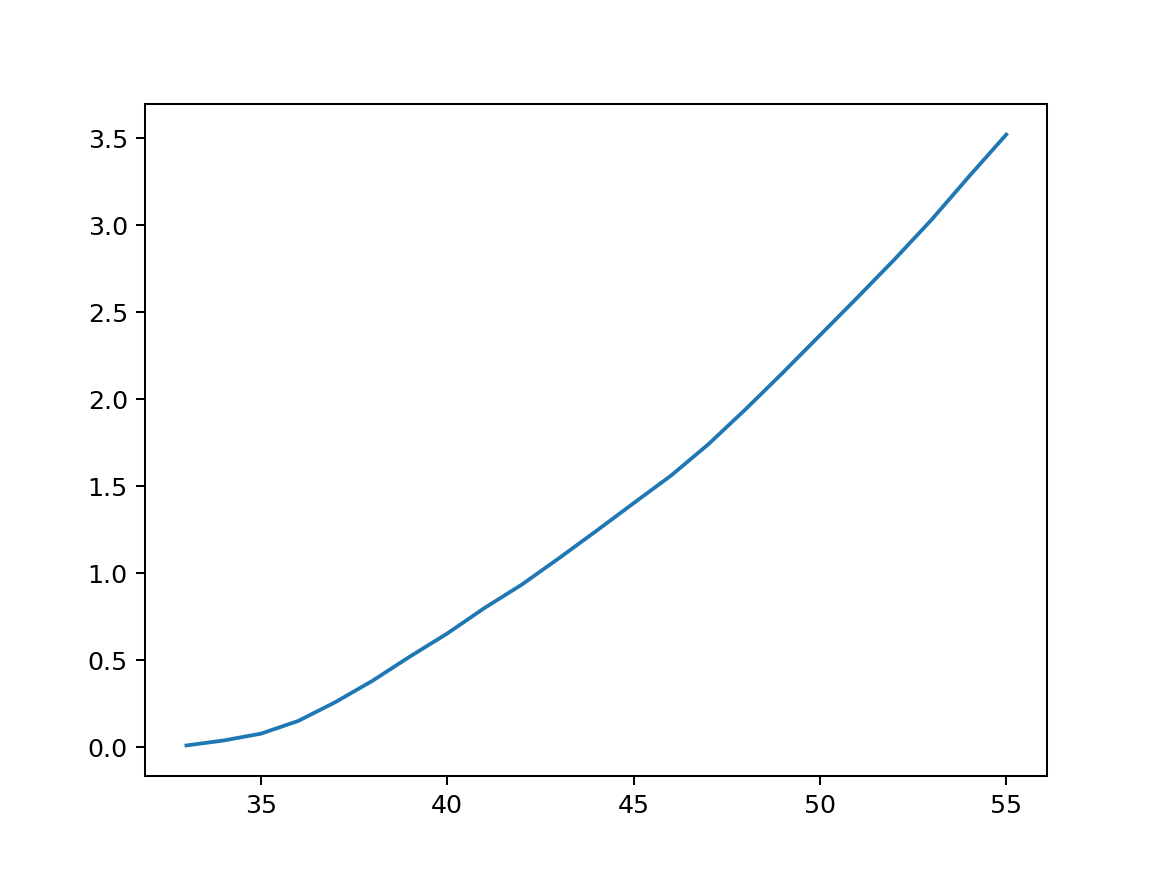

In [32]:
 """        
 (Casnati's equation) was found to fit cross-section data to
 typically better than +-10% over the range 1<=Uk<=20 and 6<=Z<=79."
 
 Note: This result is for K shell. L & M are much less well characterized.
 C. Powell indicated in conversation that he believed that Casnati's
 expression was the best available for L & M also.
"""
shell_occupancy={'K':2,'L-1':2,'L-2':2,'L-3':4,'M-1':2,'M-1':2,'M-2':2,'M-3':4,'M-4':4,'M-5':6}
import scipy.constants as const
res = 0.0;
beamE = 30
rel = []
Z= []
shell = 'M-4'
for element in range(25,56):
    ee = ffast[element]['edges'][shell]#shell.getEdgeEnergy();
    u =  ee/beamE;
    print(u)
    if(u > 1.0):
        u2 = u * u;
        phi = 10.57 * np.exp((-1.736 / u) + (0.317 / u2));
        #psi = Math.pow(ee / PhysicalConstants.RydbergEnergy, -0.0318 + (0.3160 / u) + (-0.1135 / u2));
        psi = np.power(ee / const.Rydberg, -0.0318 + (0.3160 / u) + (-0.1135 / u2));

        i = ee / const.electron_mass# PhysicalConstants.ElectronRestMass;
        t = beamE / const.electron_mass#PhysicalConstants.ElectronRestMass;
        f = ((2.0 + i) / (2.0 + t)) * np.sqrt((1.0 + t) / (1.0 + i)) * np.power(((i + t) * (2.0 + t) * np.sqrt(1.0 + i))/ ((t * (2.0 + t) * np.sqrt(1.0 + i)) + (i * (2.0 + i))), 1.5);
        getGroundStateOccupancy = shell_occupancy[shell]
        res = ((getGroundStateOccupancy * np.sqrt((const.value('Bohr radius') * const.Rydberg) / ee) * f * psi * phi * np.log(u)) / u);
        
        rel.append(res)
        Z.append(element)
    print(res)
    
plt.figure()
plt.plot(Z,rel)

Even though the cross section raises fast with overvoltage $U$, 
too low overvoltage leads to a small cross section, which results in poor excitation of the X-ray line.

We can also see that the intial overvoltage $U_0$ varies with atomic number $Z$, which will affect the relative generation of X-rays from different elements.


## X-ray Production in a Thin Foil

Now we have all the ingeedients to look at the total generation of X-rays.

The number of photons $n_X$ produced in a thin foil of thickness $t$ is :
$$ n_x  = Q_I(E) \ \omega   N_A  \frac{1}{A} \rho \ t $$

- $n_X$ [photons/e^-]
- $Q_I(E)$ [ ionizations/e$^-$ (atoms / cm$^2$)): ionization cross section
- $\omega$ [X-rays/ ionization]: fluorescent yield = number of X-rays generated per ionization
- $ N_A$  [atoms per mol]: Avogadro’s number 
- $A$ [g/moles]: atomic weight
- $\rho$ [g/cm$^3$]: density of sample
- $t$ [cm]: thickness of sample

The number of X-rays increase linearly with the number of atoms per unit area ($N_A  \frac{1}{A} \rho \ t $).


## X-ray Production in a Thick Solid Sample

If the sample is sufficient thick so that all electrons interact ( several micrometers) thr X-ray intensity is found to follow an expression fo the form:

$$I \approx i_p \left[ (E_0-E_c)/E_0\right]^n \approx i_p [U_0-1]^n$$

where:
- $i_p$: beam current 
- $n$: exponent $n$ depends on particular element and shell (Lifshin et al. 1980) 

The exponent $n$ is ususally between 1.5 and 2. See what changes in the plot below if you change this exponent.

<IPython.core.display.Javascript object>


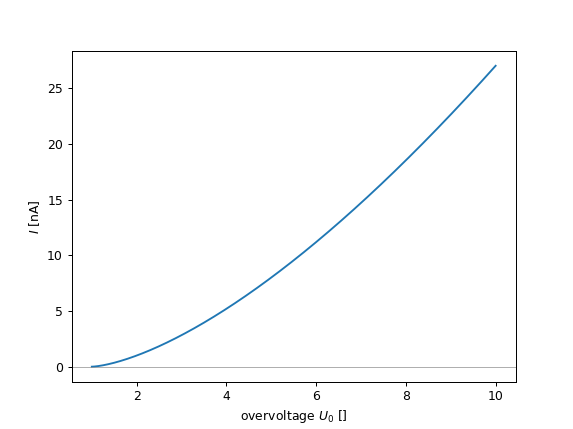

In [5]:
n = 1.5

U_0 = np.linspace(1,10, 2048)
i_p = 1.0 # in nA
I = i_p * (U_0-1.0)**n

plt.figure()
plt.plot(U_0,I)
plt.axhline(y=0., color='gray', linewidth=0.5)
plt.xlabel('overvoltage $U_0$ []')
plt.ylabel('$I$ [nA]');

In the graph above, we can see the importance of the overvoltage $U$ by how the intensity increase with increasing $U_0$

## Quiz
Why is the overvoltage increasing so much whicle the cross section remains rather constant above the threshold? 